**THE SPARKS FOUNDATION**

**By Umakant Patil, DATA SCIENCE & BUSINESS ANALYTICS INTERN**



**Task-8 Timeline Analysis : Covid-19 (Level - Advanced)**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline
sns.set()

**Importing Data**

In [21]:
df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

In [22]:

df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,0.714,NaN,NaN,0.0,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,0.0,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,NaN,NaN,0.0,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,NaN,NaN,0.0,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-03-04,5.0,0.0,0.000,NaN,NaN,0.0,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [23]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.474580e+05,147452.000000,146307.000000,1.303840e+05,130579.000000,146307.000000,146769.000000,146763.000000,145623.000000,129708.000000,...,95819.000000,94439.000000,61954.000000,111772.000000,140068.000000,123180.000000,5125.000000,5125.000000,5125.000000,5125.000000
mean,2.074113e+06,7941.647411,7941.362455,5.170971e+04,171.529258,152.595370,22580.282564,97.327591,96.968286,445.505895,...,10.582787,32.758765,50.826671,3.027317,73.597403,0.725906,33933.533385,8.989011,16.209239,849.068933
std,1.229187e+07,43390.030926,42736.548043,2.719745e+05,835.236109,772.799919,36882.664806,300.618153,216.398701,708.285860,...,10.499135,13.520958,31.813127,2.453656,7.489874,0.149984,95909.379877,16.682299,31.277328,1264.970282
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-3125.829000,-272.971000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-31959.400000,-28.450000,-95.920000,-1745.051271
25%,1.495000e+03,1.000000,5.571000,6.600000e+01,0.000000,0.000000,491.586000,0.022000,1.406000,15.184000,...,1.900000,21.600000,20.859000,1.300000,69.500000,0.602000,-98.400000,-0.870000,-0.580000,-38.847199
50%,1.969050e+04,67.000000,88.286000,6.560000e+02,2.000000,1.286000,3914.443000,9.748000,15.377000,101.504000,...,6.300000,31.400000,49.839000,2.400000,75.050000,0.743000,2609.300000,5.510000,7.140000,404.628241
75%,2.479498e+05,903.000000,953.785500,6.334000e+03,19.000000,15.000000,29305.685000,84.143000,96.607500,602.476000,...,19.100000,41.300000,83.241000,4.000000,78.930000,0.845000,21491.200000,13.880000,22.620000,1437.343286
max,2.765884e+08,971581.000000,827255.429000,5.371276e+06,18062.000000,14704.714000,280916.307000,51427.491000,7406.207000,6069.891000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,984309.300000,115.000000,374.200000,7733.995683


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150083 entries, 0 to 150082
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    150083 non-null  object 
 1   continent                                   141024 non-null  object 
 2   location                                    150083 non-null  object 
 3   date                                        150083 non-null  object 
 4   total_cases                                 147458 non-null  float64
 5   new_cases                                   147452 non-null  float64
 6   new_cases_smoothed                          146307 non-null  float64
 7   total_deaths                                130384 non-null  float64
 8   new_deaths                                  130579 non-null  float64
 9   new_deaths_smoothed                         146307 non-null  float64
 

In [25]:
df.shape

(150083, 67)

In [26]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 67)


In [27]:

df.count()

iso_code                                   150083
continent                                  141024
location                                   150083
date                                       150083
total_cases                                147458
                                            ...  
human_development_index                    123180
excess_mortality_cumulative_absolute         5125
excess_mortality_cumulative                  5125
excess_mortality                             5125
excess_mortality_cumulative_per_million      5125
Length: 67, dtype: int64

**Checking the Missing or Null values**


In [28]:
print(df.isnull().sum())

iso_code                                        0
continent                                    9059
location                                        0
date                                            0
total_cases                                  2625
                                            ...  
human_development_index                     26903
excess_mortality_cumulative_absolute       144958
excess_mortality_cumulative                144958
excess_mortality                           144958
excess_mortality_cumulative_per_million    144958
Length: 67, dtype: int64


In [29]:
df1 = df[["date", "total_cases", "new_cases", "total_deaths", "new_tests", "total_tests"]]
df1.head()

,date,total_cases,new_cases,total_deaths,new_tests,total_tests
0,2020-02-24,5.0,5.0,NaN,NaN,NaN
1,2020-02-25,5.0,0.0,NaN,NaN,NaN
2,2020-02-26,5.0,0.0,NaN,NaN,NaN
3,2020-02-27,5.0,0.0,NaN,NaN,NaN
4,2020-02-28,5.0,0.0,NaN,NaN,NaN


In [30]:
df1.date = pd.to_datetime(df.date)
df1.set_index('date', inplace = True)
df1.head()
df1.tail()

C:\Users\Smart\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,total_cases,new_cases,total_deaths,new_tests,total_tests
date,,,,,
2021-12-22,199404.0,1636.0,4828.0,4663.0,1662044.0
2021-12-23,201344.0,1940.0,4855.0,3919.0,1665963.0
2021-12-24,202736.0,1392.0,4871.0,NaN,NaN
2021-12-25,203746.0,1010.0,4885.0,NaN,NaN
2021-12-26,204351.0,605.0,4891.0,NaN,NaN


Text(0.5, 0, 'Month')

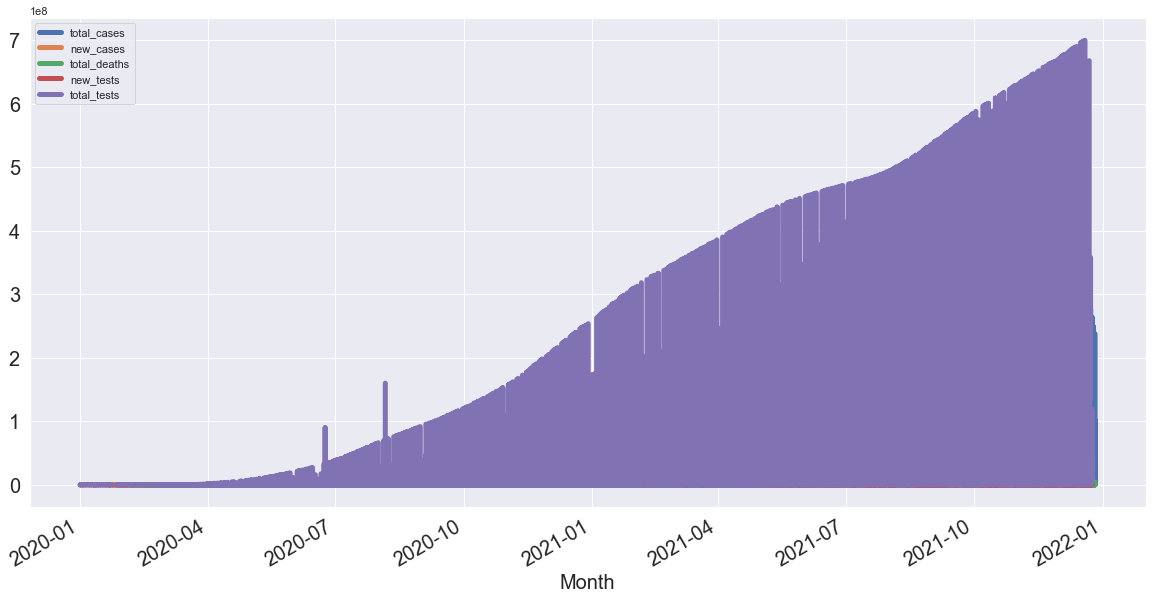

In [31]:
df1.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

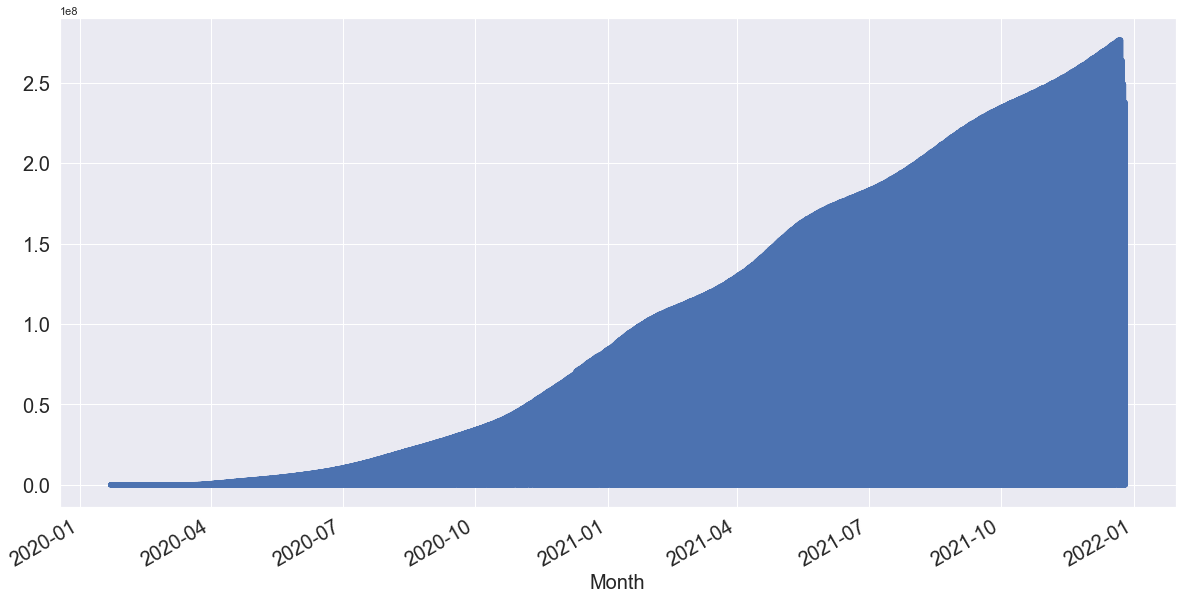

In [32]:
df1.total_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

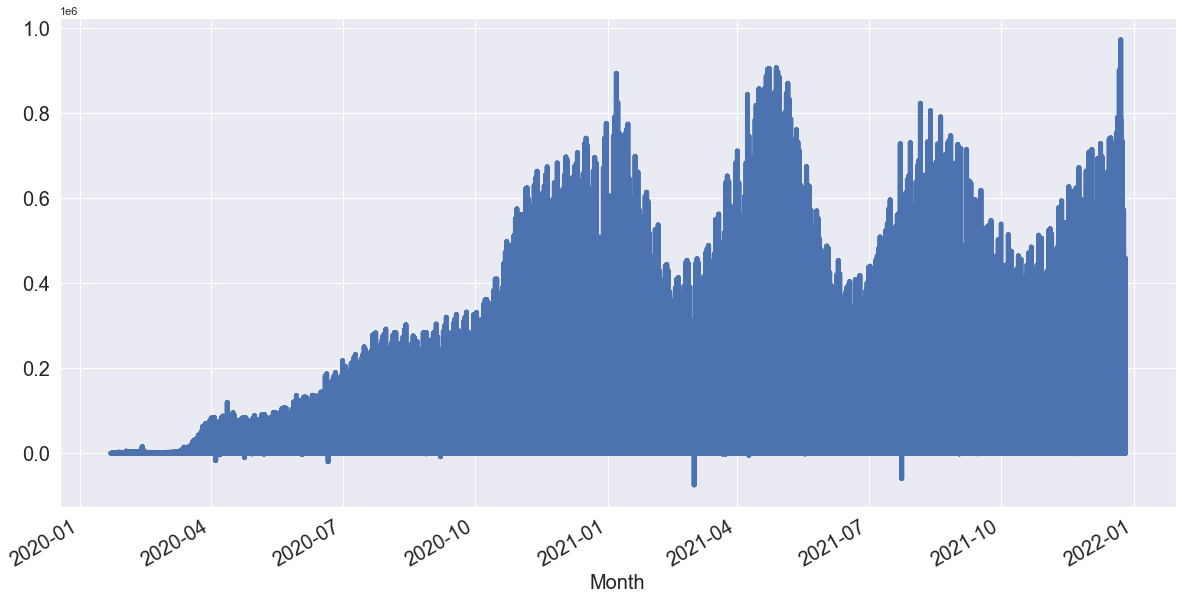

In [33]:
df1.new_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

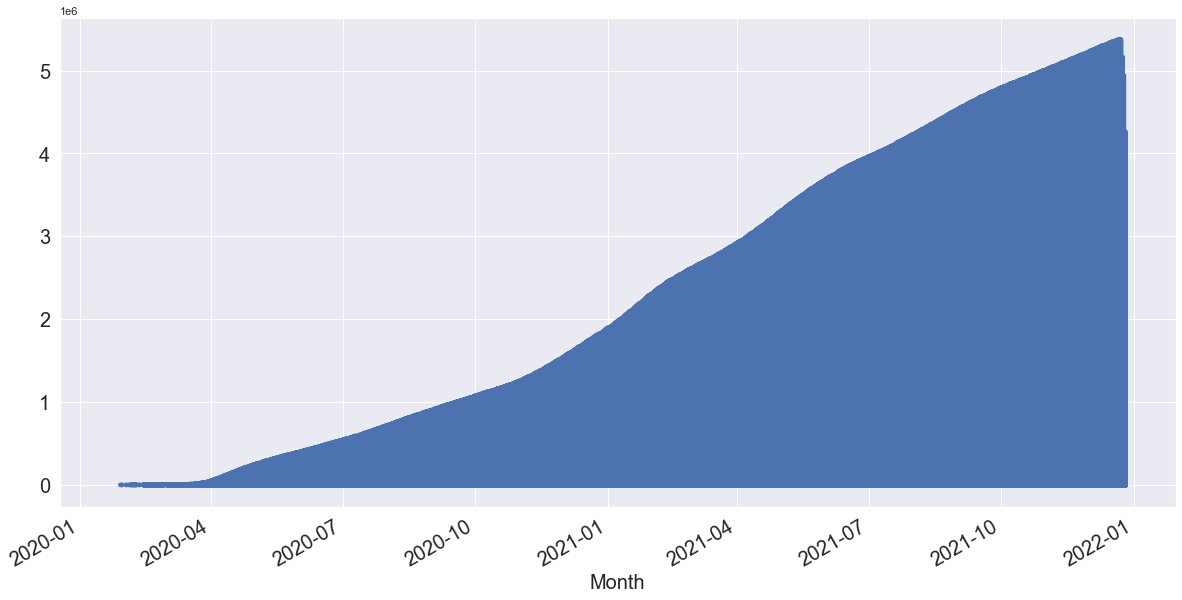

In [34]:
df1.total_deaths.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

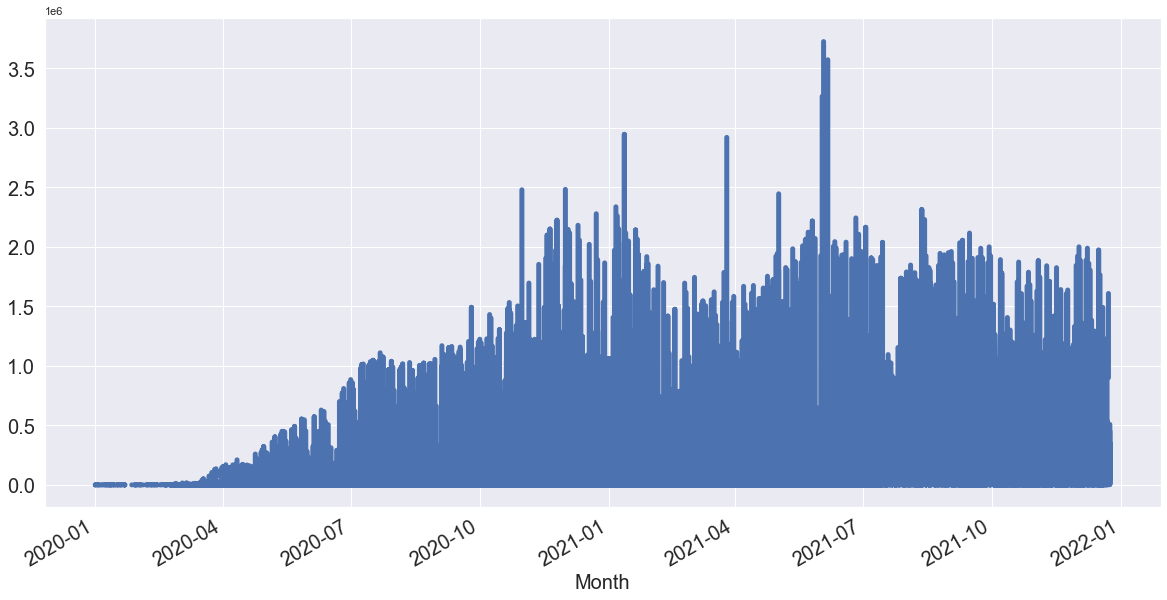

In [35]:
df1.new_tests.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

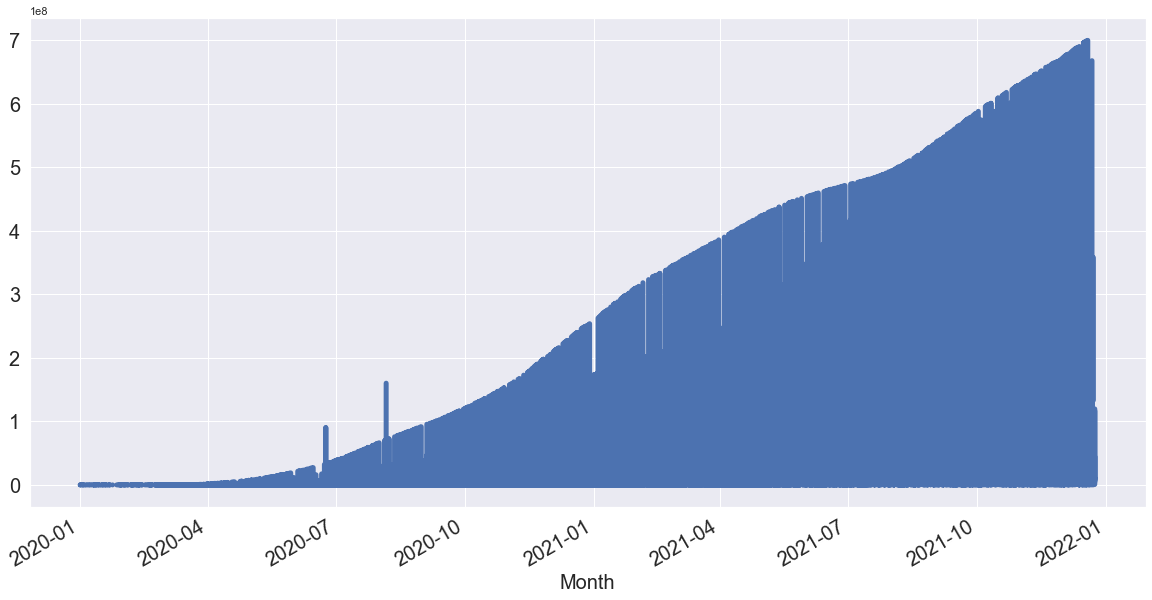

In [36]:
df1.total_tests.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

**Trends and Seasonality in TimeSeries Data**

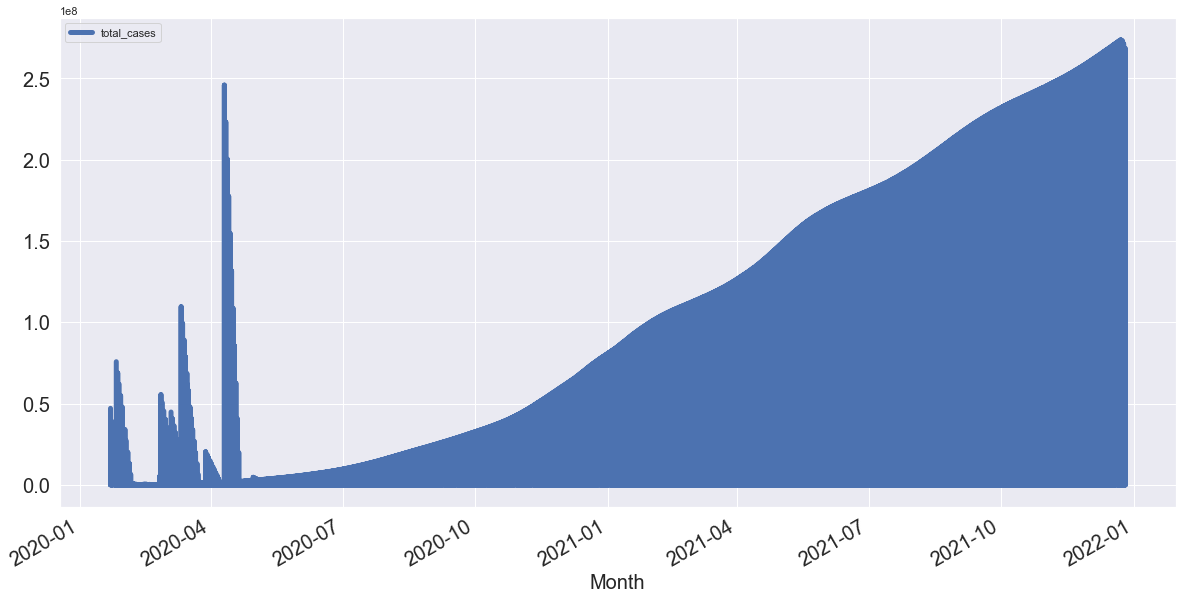

In [37]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

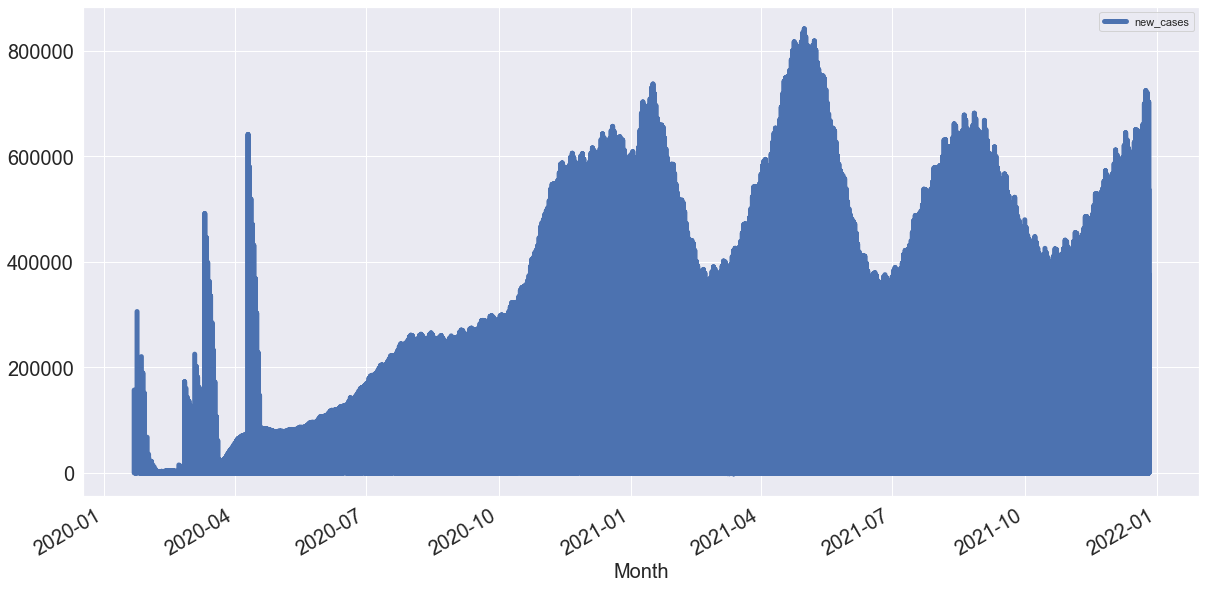

In [38]:
new_cases = df1[['new_cases']]
new_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

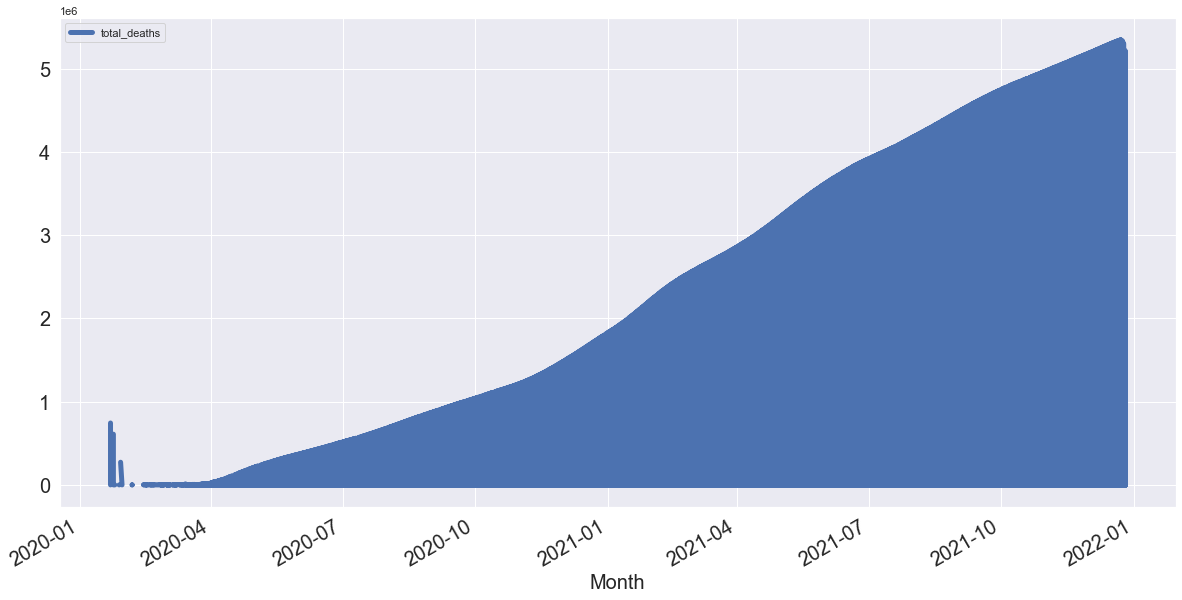

In [39]:
total_deaths = df1[['total_deaths']]
total_deaths.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);


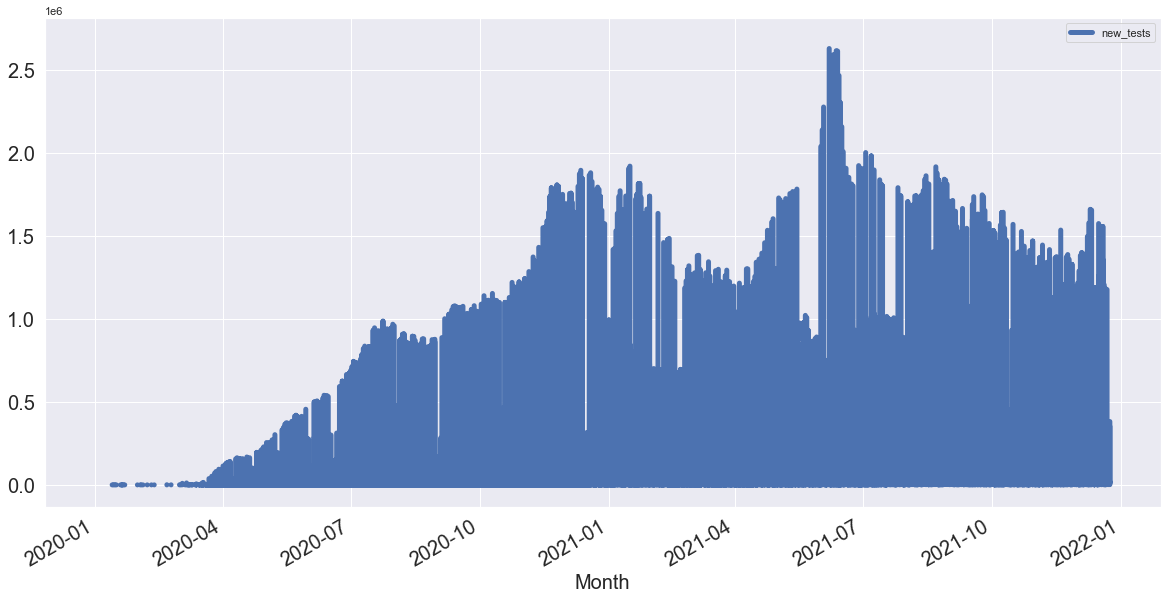

In [40]:
new_tests = df1[['new_tests']]
new_tests.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

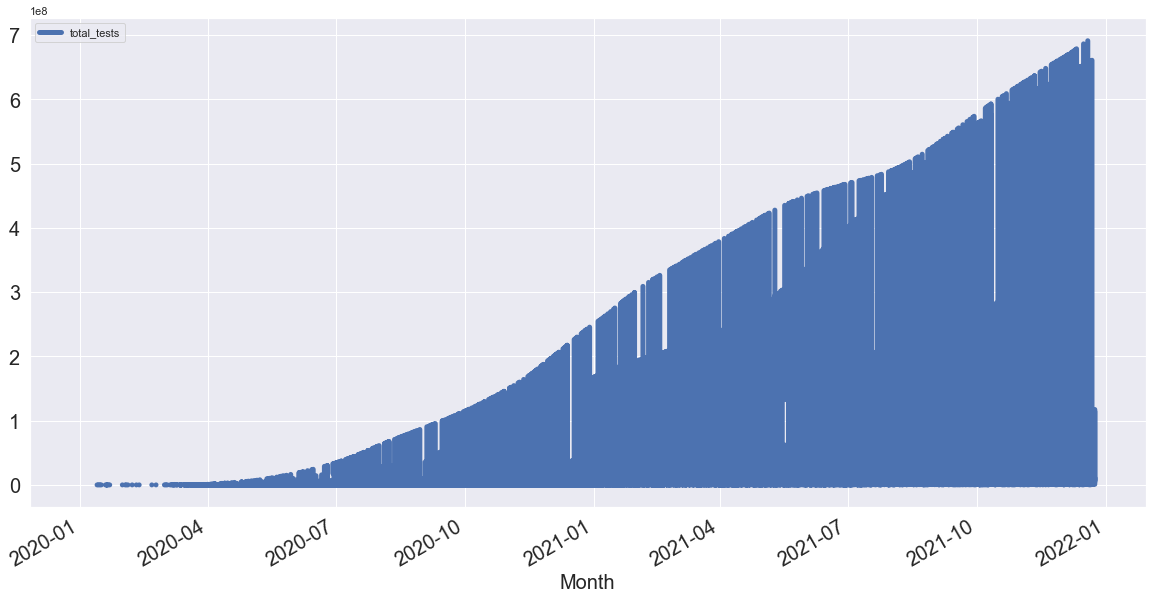

In [41]:
total_tests = df1[['total_tests']]
total_tests.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

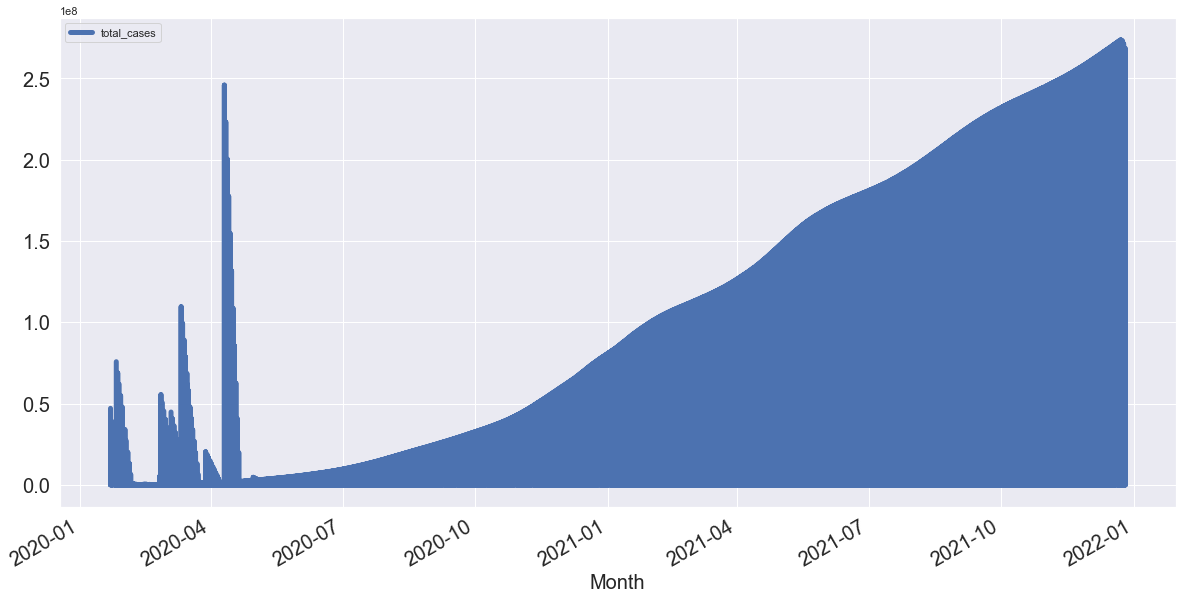

In [42]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);
